https://colab.research.google.com/drive/1GGXt_tw1A6wkaC2vTi65sR_CaWGFBlby#scrollTo=flZ7Gdi658ui

In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
file_id = "1w_4xTCDYcY-lu3p1zB3pT2EjM7CuXIaa"
url = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(url)

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [4]:
df.shape

(43400, 12)

<ipython-input-5-f2a27e5e3090>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_percentages.index, y=class_percentages.values, palette='viridis')


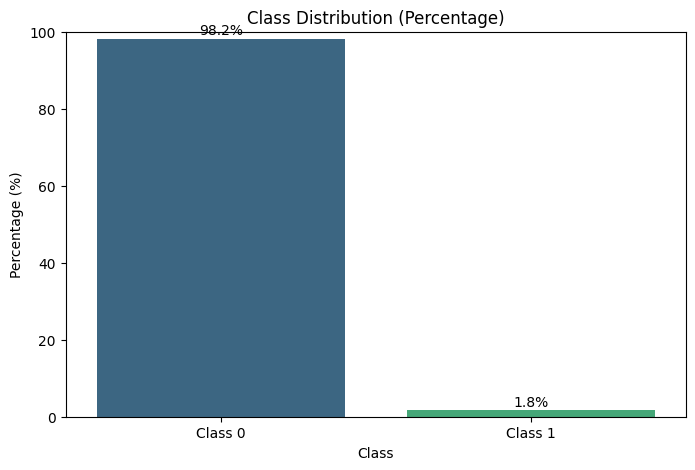

In [5]:
class_counts = df['stroke'].value_counts()

# Calculate percentages
class_percentages = (class_counts / class_counts.sum()) * 100

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=class_percentages.index, y=class_percentages.values, palette='viridis')
plt.title('Class Distribution (Percentage)')
plt.xlabel('Class')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=class_percentages.index, labels=['Class 0', 'Class 1'], rotation=0)

# Adding percentage labels on the bars
for i, percentage in enumerate(class_percentages):
    plt.text(i, percentage + 1, f'{percentage:.1f}%', ha='center')

plt.ylim(0, 100)  # Set y-axis limit to 100%
plt.show()

In [6]:

# Count the number of missing values in each column
missing_values = df.isnull().sum()

# Print the number of missing values for each column
print("Number of missing values for each column:")
print(missing_values)


Number of missing values for each column:
id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64


manual investigating of data

In [7]:
y = df['stroke']  # Target variable
# Count occurrences of each value in the strokes column
age_threshold = 21
stroke_counts = y.value_counts()

print("Counts of each stroke value:")
print(stroke_counts)
print("###########################")
# Filter rows where age is below age_threshold and count occurrences of strokes
smoking_status_counts = df[df['age'] < age_threshold]['stroke'].value_counts()
print(smoking_status_counts)
print("###########################")
# Filter rows where age is below 21 and count occurrences of each smoking status
smoking_status_counts = df[df['age'] < age_threshold]['smoking_status'].value_counts(dropna=False)

print("Counts of each smoking status where age < 21:")
print(smoking_status_counts)
print("###########################")
filtered_data = df[(df['age'] < age_threshold) & (df['stroke'] == 1)]
print(filtered_data)

Counts of each stroke value:
stroke
0    42617
1      783
Name: count, dtype: int64
###########################
stroke
0    9013
1       2
Name: count, dtype: int64
###########################
Counts of each smoking status where age < 21:
smoking_status
NaN                6568
never smoked       1884
formerly smoked     310
smokes              253
Name: count, dtype: int64
###########################
          id  gender    age  hypertension  heart_disease ever_married  \
9961   69768  Female   1.32             0              0           No   
14802  49669  Female  14.00             0              0           No   

      work_type Residence_type  avg_glucose_level   bmi smoking_status  stroke  
9961   children          Urban              70.37   NaN            NaN       1  
14802  children          Rural              57.93  30.9            NaN       1  


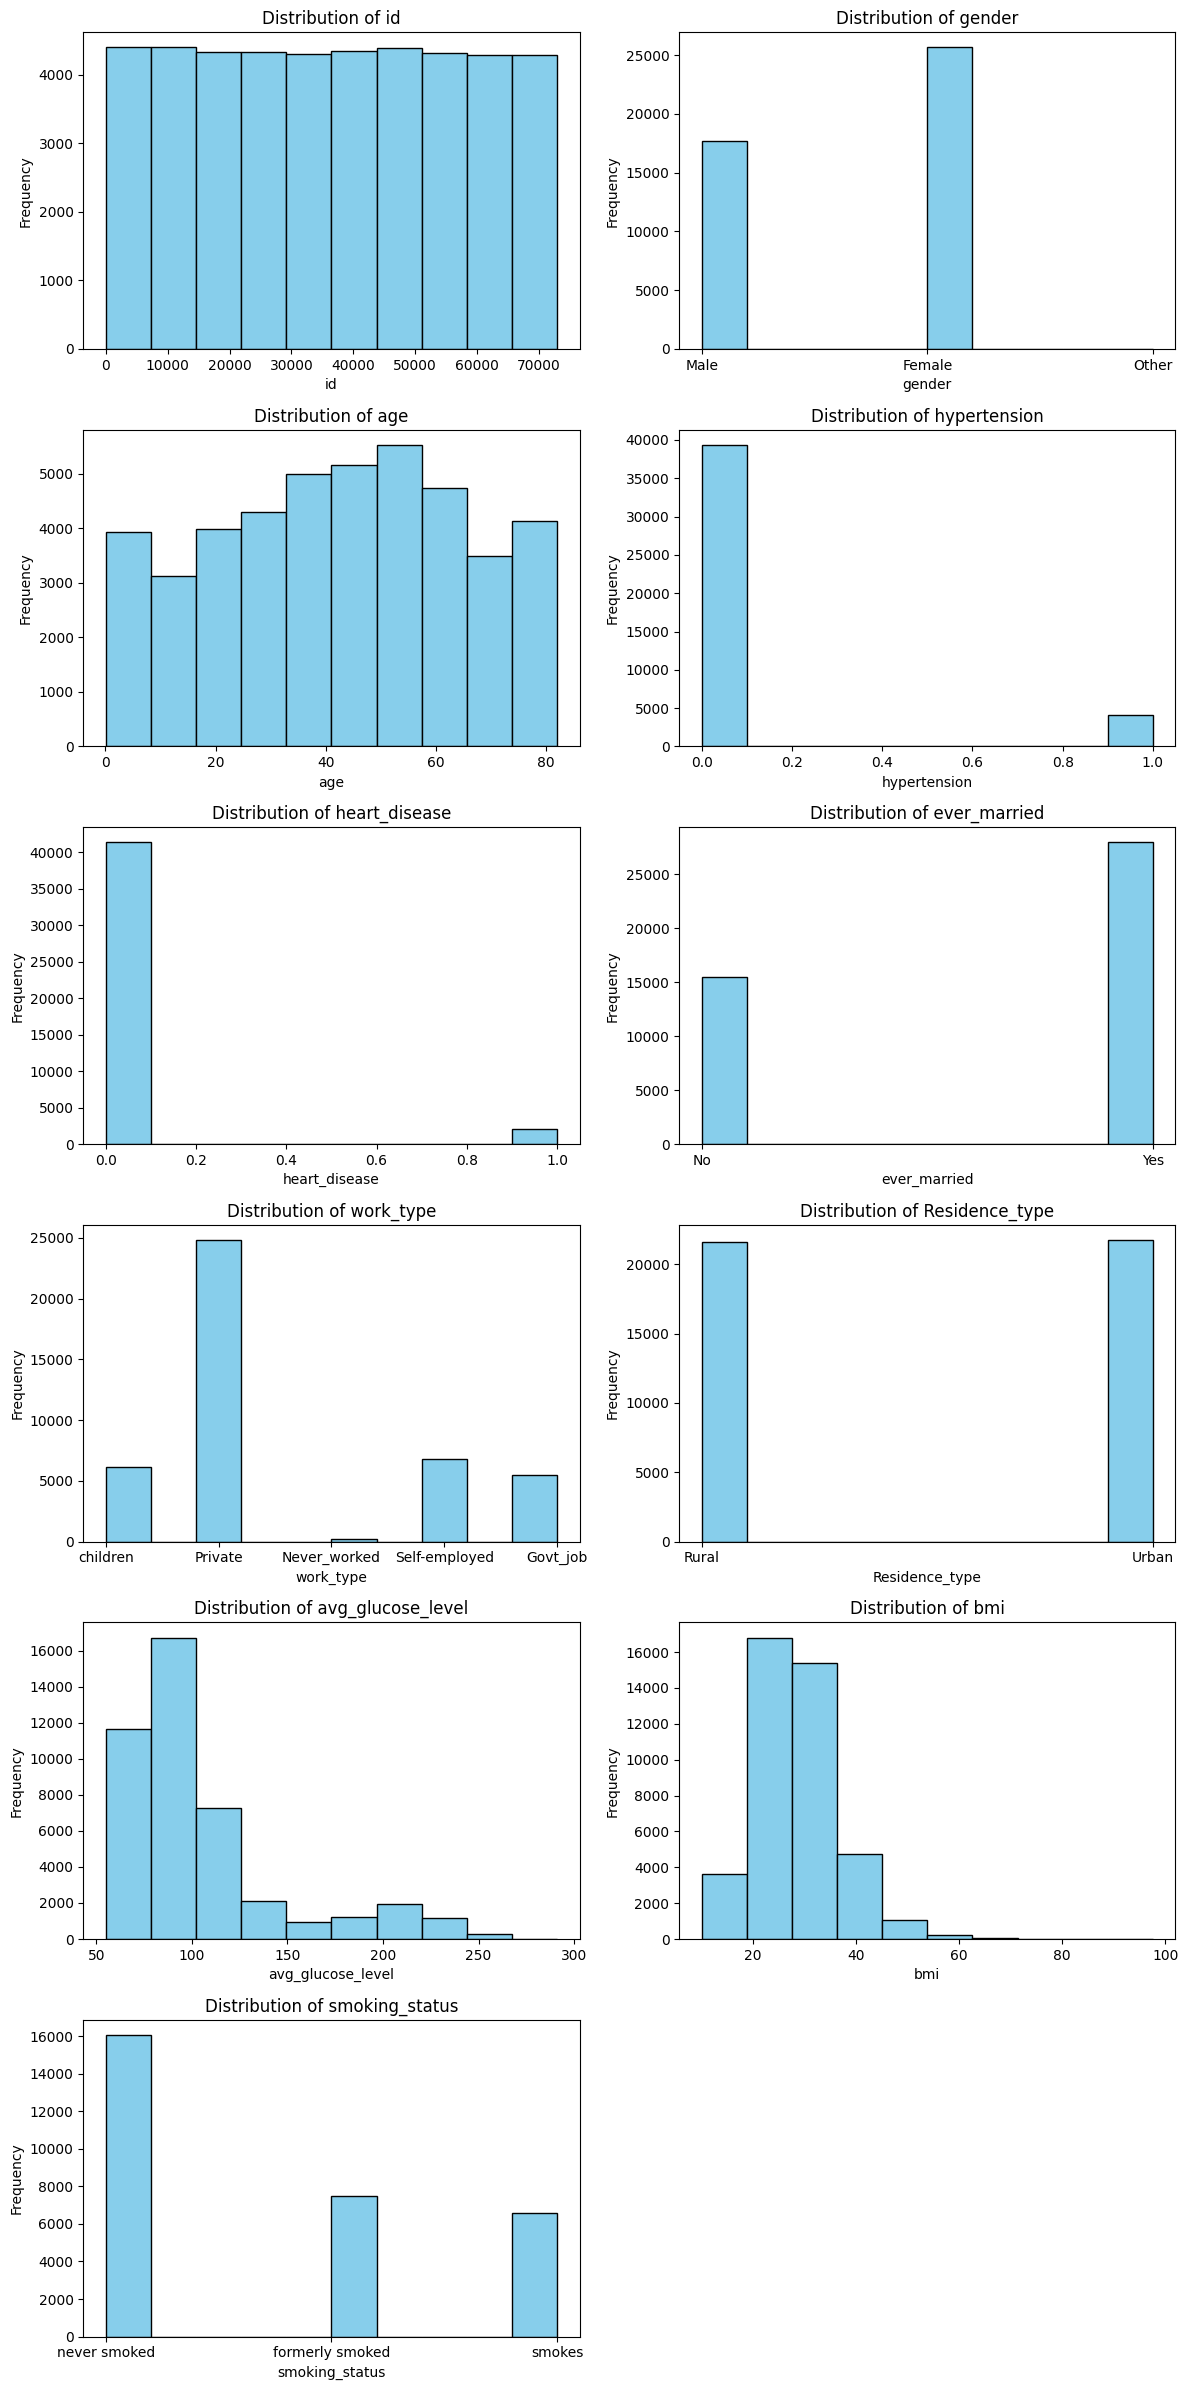

In [8]:
predictor_columns = df.columns[:-1]

# Set up the number of subplots
n_cols = 2  # Number of columns for subplots
n_rows = (len(predictor_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

plt.figure(figsize=(12, n_rows * 4))  # Set the figure size

# Iterate through each predictor column and create a histogram
for i, column in enumerate(predictor_columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Create a subplot
    plt.hist(df[column].dropna(), bins=10, color='skyblue', edgecolor='black')  # Plot histogram
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

# Prepare X and y
X = df.drop(columns=['stroke','id'])  # Features (predictors)
y = df['stroke']  # Target variable
X.shape

(43400, 10)

# handling categorical data

In [10]:
categorical_feats = ['gender','ever_married', 'work_type', 'Residence_type', 'smoking_status']
unique_values = {col: set(df[col].unique()) for col in categorical_feats}

# Displaying the unique values in each column
for col, unique_set in unique_values.items():
    print(f"Unique values in {col}: {unique_set}")

Unique values in gender: {'Other', 'Female', 'Male'}
Unique values in ever_married: {'No', 'Yes'}
Unique values in work_type: {'children', 'Self-employed', 'Private', 'Govt_job', 'Never_worked'}
Unique values in Residence_type: {'Rural', 'Urban'}
Unique values in smoking_status: {'formerly smoked', nan, 'never smoked', 'smokes'}


In [11]:
X['Residence_type'] = X['Residence_type'].map({'Rural': 0, 'Urban': 1})
X['ever_married'] = X['ever_married'].map({'No': 0, 'Yes': 1})

In [12]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,3.0,0,0,0,children,0,95.12,18.0,NaN
1,Male,58.0,1,0,1,Private,1,87.96,39.2,never smoked
2,Female,8.0,0,0,0,Private,1,110.89,17.6,NaN
3,Female,70.0,0,0,1,Private,0,69.04,35.9,formerly smoked
4,Male,14.0,0,0,0,Never_worked,0,161.28,19.1,NaN


In [13]:
count_other = X['gender'].value_counts().get("Other", 0)

print(f"Number of 'Other' in gender: {count_other}")

Number of 'Other' in gender: 11


In [14]:
# Print the shape before removing rows
print(f'Before removing gender=="Other" rows: X shape = {X.shape}, y shape = {y.shape}')

# Get indices where gender is "Other"
indices_to_remove = X[X['gender'] == 'Other'].index

# Remove these indices from both X and y
X = X.drop(indices_to_remove)
y = y.drop(indices_to_remove)

# Print the shape after removing rows
print(f'After removing gender=="Other" rows: X shape = {X.shape}, y shape = {y.shape}')


Before removing gender=="Other" rows: X shape = (43400, 10), y shape = (43400,)
After removing gender=="Other" rows: X shape = (43389, 10), y shape = (43389,)


In [15]:
categorical_feats = ['gender', 'work_type', 'smoking_status']
unique_values = {col: set(X[col].unique()) for col in categorical_feats}

# Displaying the unique values in each column
for col, unique_set in unique_values.items():
    print(f"Unique values in {col}: {unique_set}")

Unique values in gender: {'Female', 'Male'}
Unique values in work_type: {'children', 'Self-employed', 'Private', 'Govt_job', 'Never_worked'}
Unique values in smoking_status: {'formerly smoked', nan, 'never smoked', 'smokes'}


In [16]:
X['gender'] = X['gender'].map({'Female': 0, 'Male': 1})

In [17]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,3.0,0,0,0,children,0,95.12,18.0,NaN
1,1,58.0,1,0,1,Private,1,87.96,39.2,never smoked
2,0,8.0,0,0,0,Private,1,110.89,17.6,NaN
3,0,70.0,0,0,1,Private,0,69.04,35.9,formerly smoked
4,1,14.0,0,0,0,Never_worked,0,161.28,19.1,NaN


work_type and smoking_status remains

In [18]:
# Filter X for rows where y is 1
X_stroke_1 = X[y == 1]

# Count unique values in 'bmi' column, including NaNs
bmi_counts = X_stroke_1['bmi'].value_counts(dropna=False)

# Count unique values in 'smoking_status' column, including NaNs
smoking_status_counts = X_stroke_1['smoking_status'].value_counts(dropna=False)

print("Counts of 'bmi' values where y == 1:")
print(bmi_counts)

print("\nCounts of 'smoking_status' values where y == 1:")
print(smoking_status_counts)


Counts of 'bmi' values where y == 1:
bmi
NaN     140
30.9      9
31.4      9
26.4      9
26.6      9
       ... 
35.3      1
42.9      1
43.6      1
40.0      1
44.4      1
Name: count, Length: 234, dtype: int64

Counts of 'smoking_status' values where y == 1:
smoking_status
never smoked       284
formerly smoked    221
NaN                145
smokes             133
Name: count, dtype: int64


**kmeans imputer for bmi and ignoring nan values for smoking**

In [19]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(missing_values=np.nan)
# Apply KNN imputation only on numerical columns
numerical_columns = X.select_dtypes(include=['float', 'int']).columns
X[numerical_columns] = imputer.fit_transform(X[numerical_columns])

In [20]:
X.shape

(43389, 10)

In [21]:
y.shape

(43389,)

In [22]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,3.0,0.0,0.0,0.0,children,0.0,95.12,18.0,NaN
1,1.0,58.0,1.0,0.0,1.0,Private,1.0,87.96,39.2,never smoked
2,0.0,8.0,0.0,0.0,0.0,Private,1.0,110.89,17.6,NaN
3,0.0,70.0,0.0,0.0,1.0,Private,0.0,69.04,35.9,formerly smoked
4,1.0,14.0,0.0,0.0,0.0,Never_worked,0.0,161.28,19.1,NaN


In [23]:
X = pd.get_dummies(X, columns=['smoking_status', 'work_type'])
X

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1.0,3.0,0.0,0.0,0.0,0.0,95.12,18.0,False,False,False,False,False,False,False,True
1,1.0,58.0,1.0,0.0,1.0,1.0,87.96,39.2,False,True,False,False,False,True,False,False
2,0.0,8.0,0.0,0.0,0.0,1.0,110.89,17.6,False,False,False,False,False,True,False,False
3,0.0,70.0,0.0,0.0,1.0,0.0,69.04,35.9,True,False,False,False,False,True,False,False
4,1.0,14.0,0.0,0.0,0.0,0.0,161.28,19.1,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,0.0,10.0,0.0,0.0,0.0,1.0,58.64,20.4,False,True,False,False,False,False,False,True
43396,0.0,56.0,0.0,0.0,1.0,1.0,213.61,55.4,True,False,False,True,False,False,False,False
43397,0.0,82.0,1.0,0.0,1.0,1.0,91.94,28.9,True,False,False,False,False,True,False,False
43398,1.0,40.0,0.0,0.0,1.0,1.0,99.16,33.2,False,True,False,False,False,True,False,False


In [24]:
# Convert boolean columns to integer (True -> 1, False -> 0)
X = X.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# Convert all integer columns to float
X = X.astype({col: 'float' for col in X.select_dtypes(include='int').columns})

# Convert all remaining columns to float
X = X.astype({col: 'float' for col in X.columns if X[col].dtype != 'float'})

# Verify the changes
print(X.dtypes)

<ipython-input-24-3a1c73ac3305>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(lambda x: int(x) if isinstance(x, bool) else x)


gender                            float64
age                               float64
hypertension                      float64
heart_disease                     float64
ever_married                      float64
Residence_type                    float64
avg_glucose_level                 float64
bmi                               float64
smoking_status_formerly smoked    float64
smoking_status_never smoked       float64
smoking_status_smokes             float64
work_type_Govt_job                float64
work_type_Never_worked            float64
work_type_Private                 float64
work_type_Self-employed           float64
work_type_children                float64
dtype: object


In [25]:
X.shape

(43389, 16)

In [26]:

# Count the number of missing values in each column
missing_values = X.isnull().sum()

# Print the number of missing values for each column
print("Number of missing values for each column:")
print(missing_values)


Number of missing values for each column:
gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
avg_glucose_level                 0
bmi                               0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
dtype: int64


z-score normalization of bmi, age, avg_glucose_level

In [27]:
columns_to_normalize = ['avg_glucose_level', 'bmi', 'age']
X[columns_to_normalize] = X[columns_to_normalize].apply(lambda x: (x - x.mean()) / x.std())

In [28]:
# from sklearn.preprocessing import MinMaxScaler

# # Define the columns to scale
# columns_to_normalize = ['avg_glucose_level', 'bmi', 'age']

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()

# # Apply MinMax scaling to the selected columns
# X[columns_to_normalize] = scaler.fit_transform(X[columns_to_normalize])

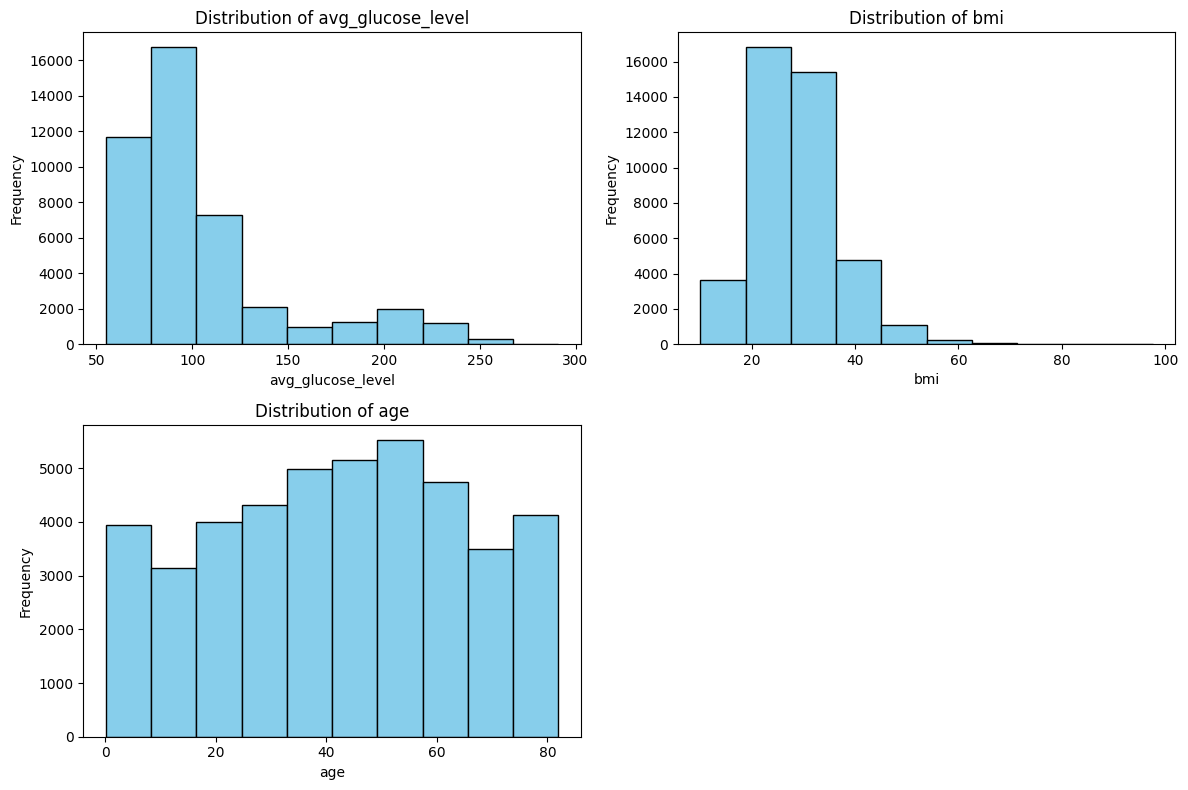

In [29]:
predictor_columns = ['avg_glucose_level', 'bmi', 'age']

# Set up the number of subplots
n_cols = 2  # Number of columns for subplots
n_rows = (len(predictor_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

plt.figure(figsize=(12, n_rows * 4))  # Set the figure size

# Iterate through each predictor column and create a histogram
for i, column in enumerate(predictor_columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Create a subplot
    plt.hist(df[column].dropna(), bins=10, color='skyblue', edgecolor='black')  # Plot histogram
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

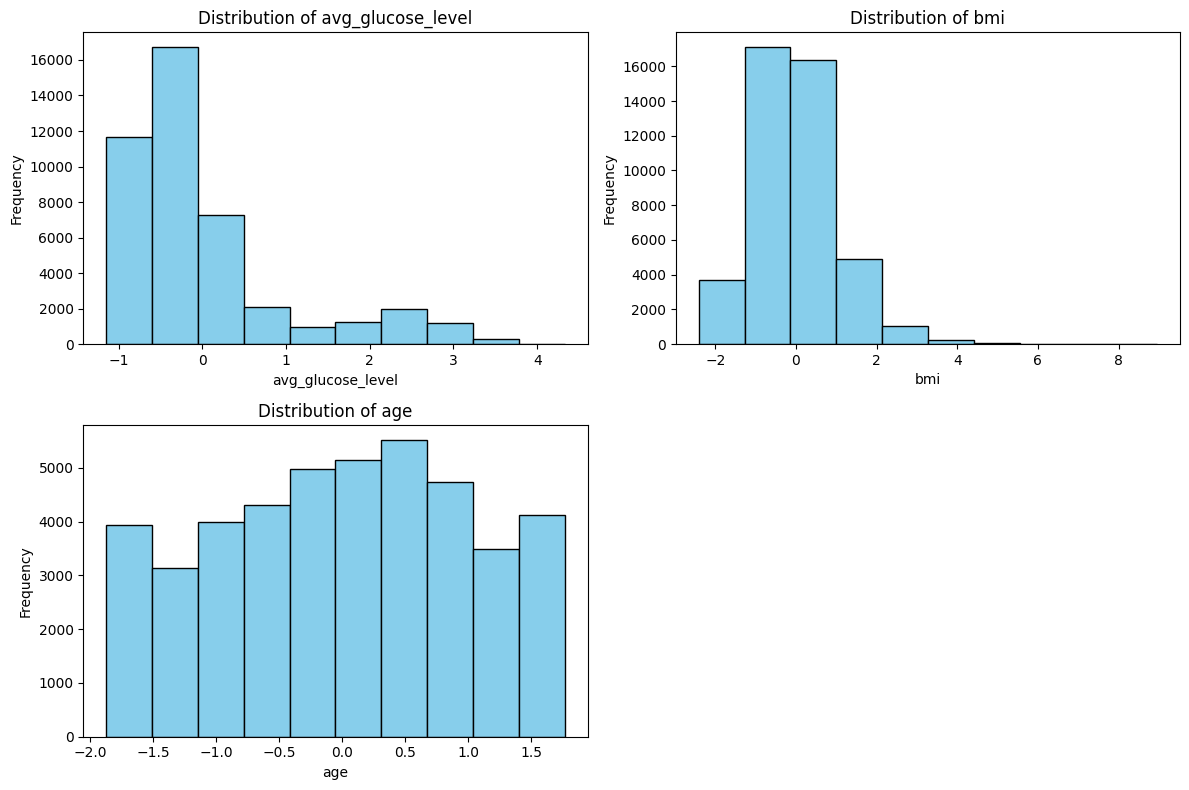

In [30]:
predictor_columns = ['avg_glucose_level', 'bmi', 'age']

# Set up the number of subplots
n_cols = 2  # Number of columns for subplots
n_rows = (len(predictor_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

plt.figure(figsize=(12, n_rows * 4))  # Set the figure size

# Iterate through each predictor column and create a histogram
for i, column in enumerate(predictor_columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Create a subplot
    plt.hist(X[column].dropna(), bins=10, color='skyblue', edgecolor='black')  # Plot histogram
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [31]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1.0,-1.741494,0.0,0.0,0.0,0.0,-0.217250,-1.385570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.700698,1.0,0.0,1.0,1.0,-0.383317,1.368653,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,-1.519476,0.0,0.0,0.0,1.0,0.148515,-1.437537,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.233540,0.0,0.0,1.0,0.0,-0.822142,0.939930,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,-1.253055,0.0,0.0,0.0,0.0,1.317245,-1.242663,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [32]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature DataFrame and y is your target Series
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (34711, 16)
X_test shape: (8678, 16)
y_train shape: (34711,)
y_test shape: (8678,)


<ipython-input-33-3221e6302944>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="Blues")


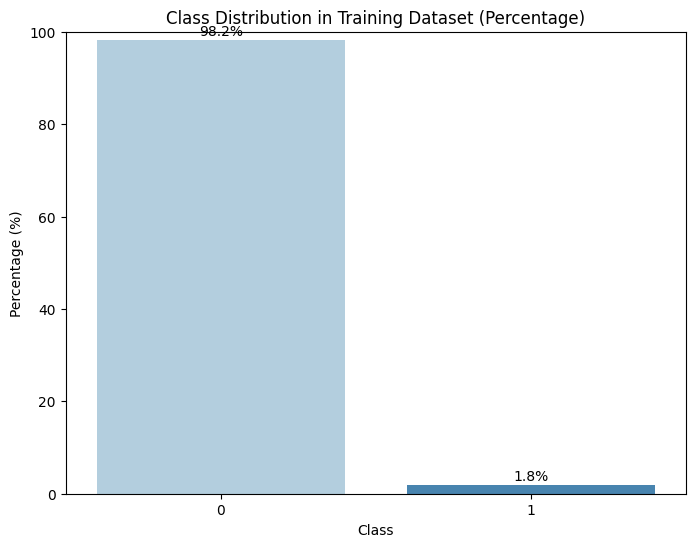

In [33]:
# @title
# Calculate the percentage of each class in y_train
class_counts = y_test.value_counts(normalize=True) * 100  # `normalize=True` gives proportions; multiplying by 100 gives percentages

# Plot the distribution as percentages
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="Blues")
plt.title("Class Distribution in Training Dataset (Percentage)")
plt.xlabel("Class")
plt.ylabel("Percentage (%)")
for i, percentage in enumerate(class_percentages):
    plt.text(i, percentage + 1, f'{percentage:.1f}%', ha='center')
plt.ylim(0, 100)  # Set y-axis limit to 100%
plt.show()

# undersampling

In [34]:
from sklearn.utils import resample

def undersample(X, y, undersample_ratio):
    # Combine X and y for easy manipulation
    data = pd.concat([X, y.rename('target')], axis=1)

    # Separate majority and minority classes
    data_majority = data[data['target'] == 0]
    data_minority = data[data['target'] == 1]

    # Calculate the target number of samples for the majority class
    n_minority = len(data_minority)
    n_majority = int(n_minority * undersample_ratio)

    # Perform undersampling on the majority class
    data_majority_undersampled = resample(data_majority,
                                          replace=False,
                                          n_samples=n_majority,
                                          random_state=42)

    # Combine the undersampled majority class with the minority class
    undersampled_data = pd.concat([data_majority_undersampled, data_minority])

    # Separate X and y after undersampling
    X_undersampled = undersampled_data.drop('target', axis=1)
    y_undersampled = undersampled_data['target']

    return X_undersampled, y_undersampled

In [35]:
ratios = [1.0, 1.5, 2.0,2.5,3.0,4.0,5.0,6.0,7.0,8.0,10.0,12.0,14.0,16.0]  # Define the desired undersample ratios
train_datasets = {}  # Dictionary to store the datasets

# Loop through each ratio and create undersampled datasets
for ratio in ratios:
    print()
    X_undersampled, y_undersampled = undersample(X_train, y_train, ratio)
    train_datasets[ratio] = (X_undersampled, y_undersampled)


# undersampling ratios

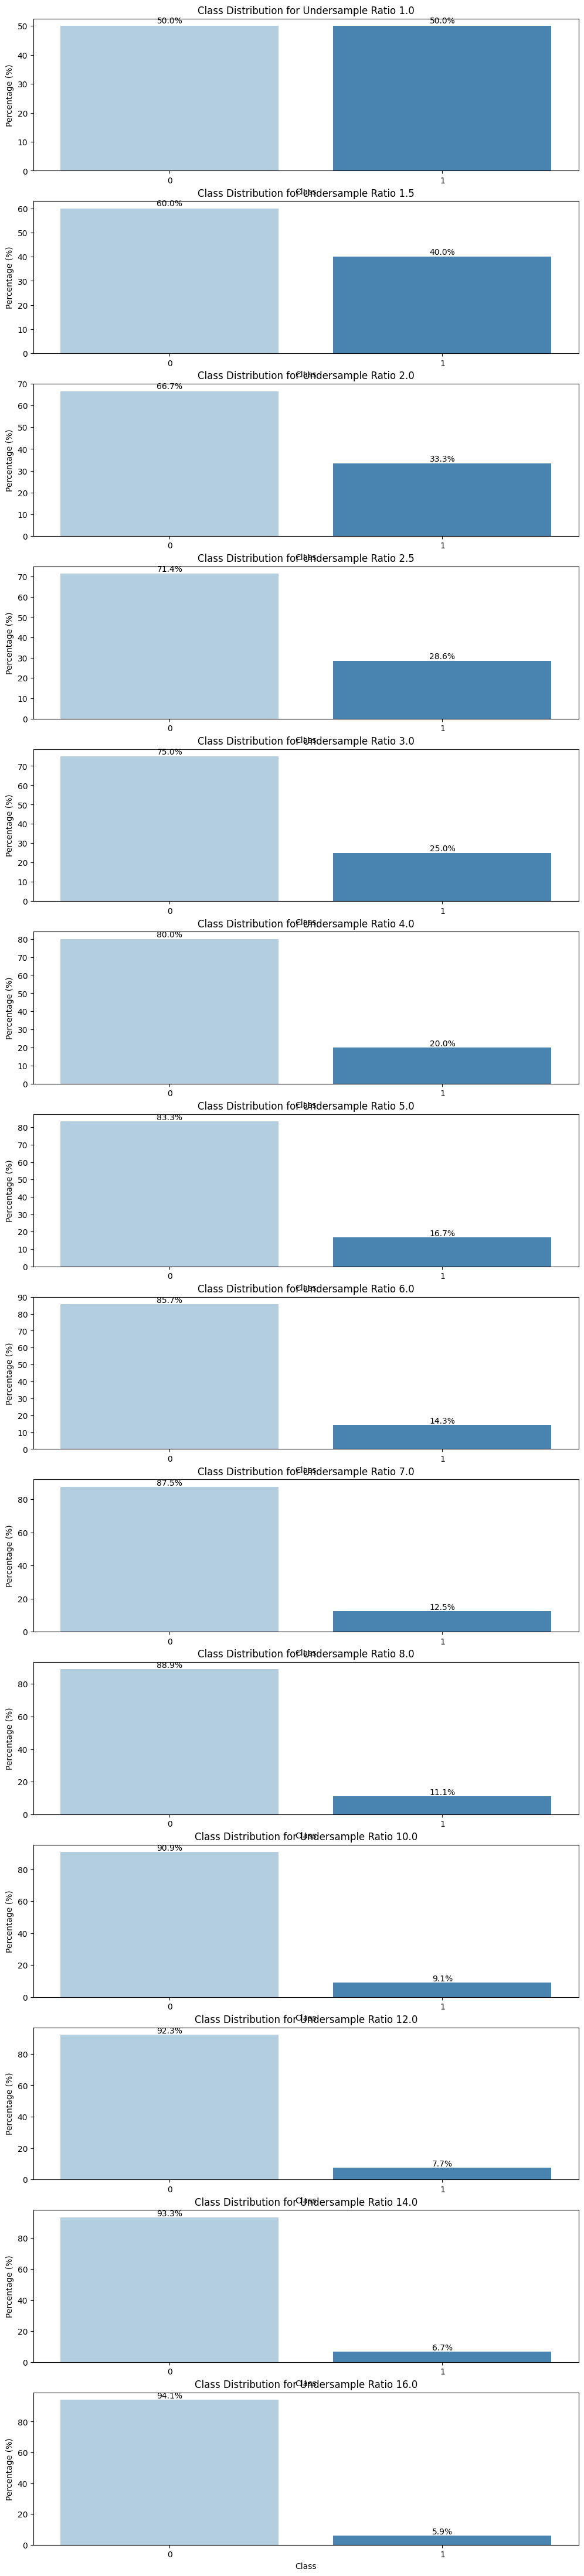

In [ ]:
plt.figure(figsize=(12, len(train_datasets) * 4))  # Set the figure size based on number of plots

for i, (ratio, (X_undersampled, y_undersampled)) in enumerate(train_datasets.items(), start=1):
    # Calculate class distribution as percentages
    class_percentages = y_undersampled.value_counts(normalize=True) * 100

    # Prepare data for plotting
    plot_data = class_percentages.reset_index()
    plot_data.columns = ['Class', 'Percentage']

    # Plot the distribution
    plt.subplot(len(train_datasets), 1, i)  # Create a subplot for each ratio
    sns.barplot(data=plot_data, x='Class', y='Percentage', hue='Class', palette="Blues", dodge=False, legend=False)
    plt.title(f"Class Distribution for Undersample Ratio {ratio}")
    plt.xlabel("Class")
    plt.ylabel("Percentage (%)")
    for i, percentage in enumerate(class_percentages):
      plt.text(i, percentage + 1, f'{percentage:.1f}%', ha='center')

# plt.tight_layout()
# plt.show()

# vectorized KNN implementation and results visualization

In [36]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import numpy as np

def knn_predict(X_train, y_train, X_test, k=3):
    # Calculate Euclidean distances
    distances = np.sqrt(((X_test[:, np.newaxis] - X_train) ** 2).sum(axis=2))

    # Get the indices of the k nearest neighbors for each test sample
    nearest_neighbors = np.argsort(distances, axis=1)[:, :k]

    # Get the k nearest labels and perform majority voting
    top_k_labels = y_train[nearest_neighbors]
    predictions = np.array([np.bincount(labels).argmax() for labels in top_k_labels])

    return predictions

import numpy as np

def knn_predict_cos(X_train, y_train, X_test, k=3):
    # Normalize X_train and X_test to unit vectors for cosine similarity
    X_train_norm = X_train / np.linalg.norm(X_train, axis=1, keepdims=True)
    X_test_norm = X_test / np.linalg.norm(X_test, axis=1, keepdims=True)

    # Calculate cosine distance (1 - cosine similarity)
    cosine_similarity = np.dot(X_test_norm, X_train_norm.T)
    cosine_distance = 1 - cosine_similarity

    # Get the indices of the k nearest neighbors for each test sample
    nearest_neighbors = np.argsort(cosine_distance, axis=1)[:, :k]

    # Get the k nearest labels and perform majority voting
    top_k_labels = y_train[nearest_neighbors]
    predictions = np.array([np.bincount(labels).argmax() for labels in top_k_labels])

    return predictions



# euclidian distance

calculating distances: 100%|██████████| 14/14 [01:04<00:00,  4.62s/it]


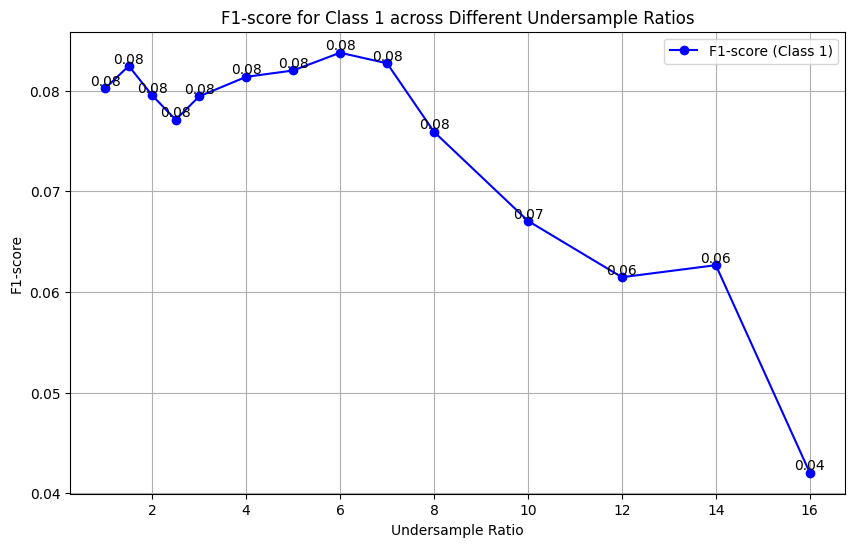

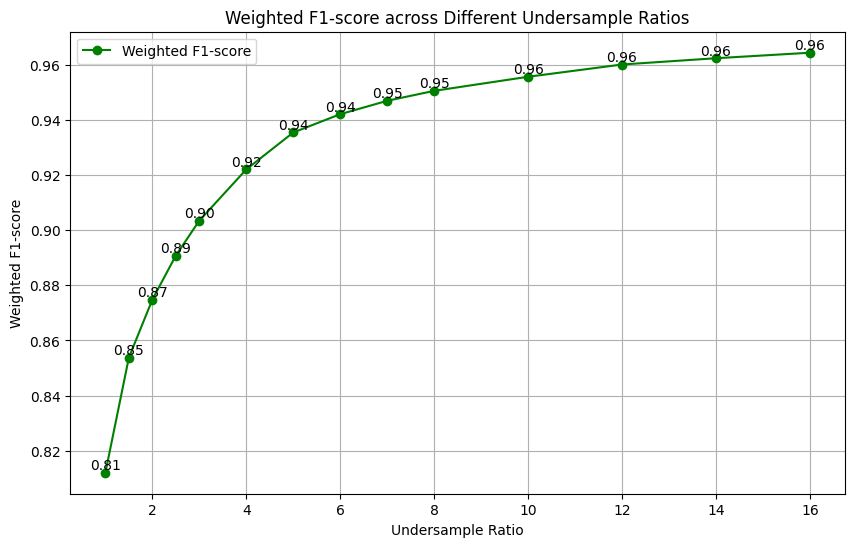

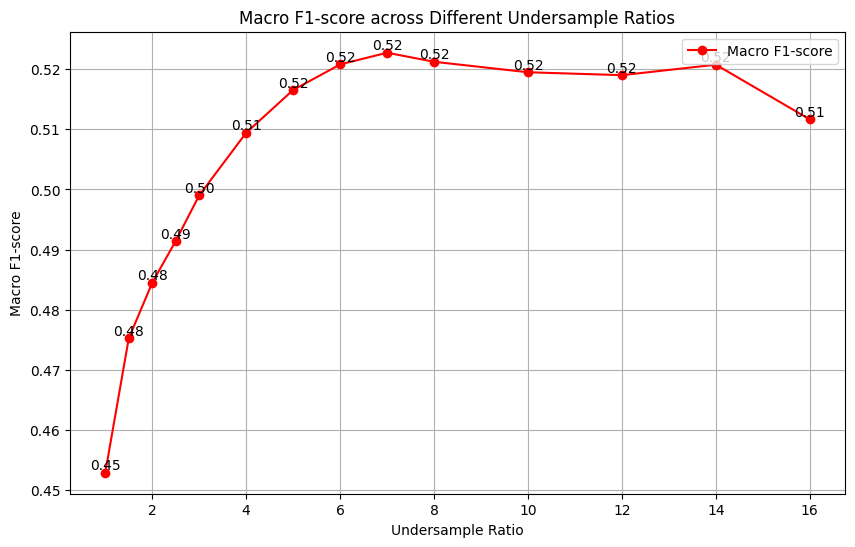

In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from tqdm import tqdm  # Import tqdm for progress bar
import matplotlib.pyplot as plt

# Set up variables for storing results
k = 3  # Number of neighbors
reports = {}
test_data = (X_test.values, y_test.values)

# Loop through each training dataset with a progress bar
for ratio, (X_train, y_train) in tqdm(train_datasets.items(), desc="calculating distances"):
    y_pred = knn_predict(X_train.values, y_train.values, X_test.values, k=k)

    # Generate classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    reports[ratio] = report

    # Plot confusion matrix for each ratio
    # ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    # plt.title(f'Confusion Matrix for Undersample Ratio {ratio}')
    # plt.show()

# Extract the f1, weighted f1, and macro f1 scores from each report
ratios = sorted(reports.keys())  # Get the ratios in sorted order for consistent plotting

# Prepare lists to store the values
f1_scores = []
weighted_f1_scores = []
macro_f1_scores = []

for ratio in ratios:
    f1_scores.append(reports[ratio]['1']['f1-score'])              # f1-score for class '1'
    weighted_f1_scores.append(reports[ratio]['weighted avg']['f1-score'])
    macro_f1_scores.append(reports[ratio]['macro avg']['f1-score'])

# Plot F1-score for class '1'
plt.figure(figsize=(10, 6))
plt.plot(ratios, f1_scores, marker='o', color='b', label='F1-score (Class 1)')
for i, score in enumerate(f1_scores):
    plt.text(ratios[i], score, f"{score:.2f}", ha='center', va='bottom')
plt.xlabel('Undersample Ratio')
plt.ylabel('F1-score')
plt.title('F1-score for Class 1 across Different Undersample Ratios')
plt.legend()
plt.grid()
plt.show()

# Plot Weighted F1-score
plt.figure(figsize=(10, 6))
plt.plot(ratios, weighted_f1_scores, marker='o', color='g', label='Weighted F1-score')
for i, score in enumerate(weighted_f1_scores):
    plt.text(ratios[i], score, f"{score:.2f}", ha='center', va='bottom')
plt.xlabel('Undersample Ratio')
plt.ylabel('Weighted F1-score')
plt.title('Weighted F1-score across Different Undersample Ratios')
plt.legend()
plt.grid()
plt.show()

# Plot Macro F1-score
plt.figure(figsize=(10, 6))
plt.plot(ratios, macro_f1_scores, marker='o', color='r', label='Macro F1-score')
for i, score in enumerate(macro_f1_scores):
    plt.text(ratios[i], score, f"{score:.2f}", ha='center', va='bottom')
plt.xlabel('Undersample Ratio')
plt.ylabel('Macro F1-score')
plt.title('Macro F1-score across Different Undersample Ratios')
plt.legend()
plt.grid()
plt.show()


# cosine distance

calculating distances:   0%|          | 0/12 [00:00<?, ?it/s]

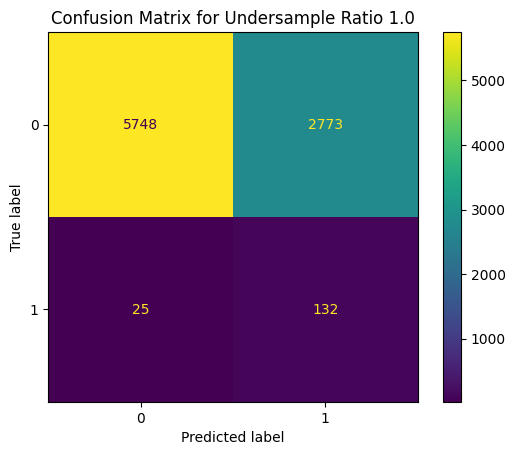

calculating distances:   8%|▊         | 1/12 [00:01<00:11,  1.03s/it]

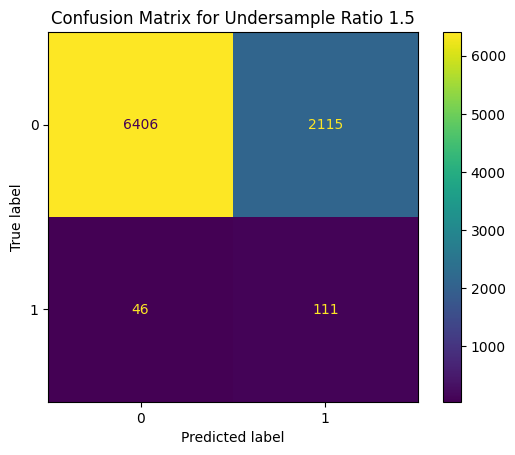

calculating distances:  17%|█▋        | 2/12 [00:02<00:11,  1.17s/it]

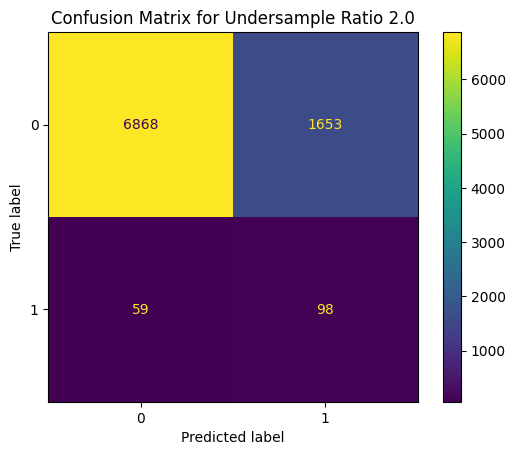

calculating distances:  25%|██▌       | 3/12 [00:03<00:12,  1.34s/it]

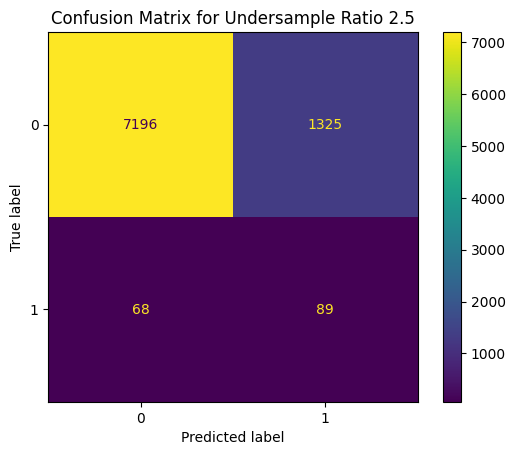

calculating distances:  33%|███▎      | 4/12 [00:05<00:12,  1.52s/it]

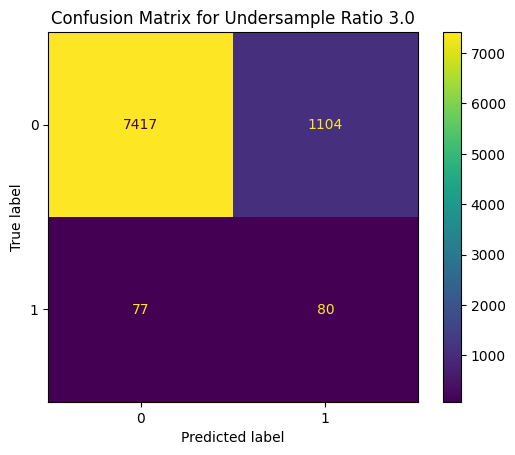

calculating distances:  42%|████▏     | 5/12 [00:07<00:11,  1.70s/it]

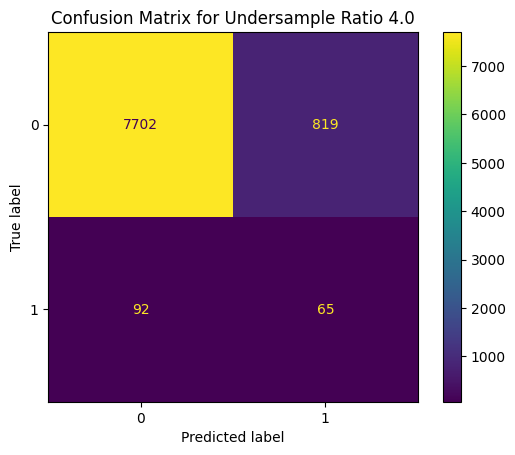

calculating distances:  50%|█████     | 6/12 [00:10<00:11,  1.99s/it]

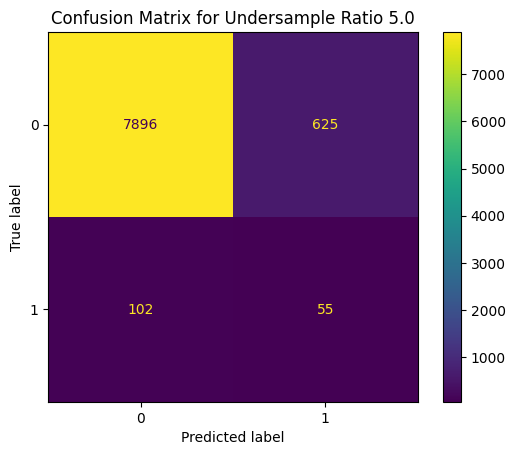

calculating distances:  58%|█████▊    | 7/12 [00:13<00:11,  2.36s/it]

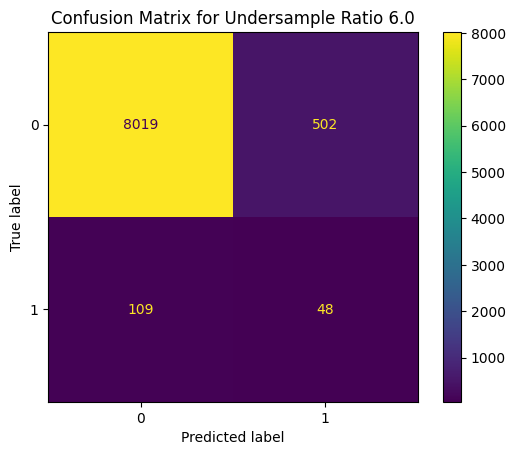

calculating distances:  67%|██████▋   | 8/12 [00:17<00:11,  2.78s/it]

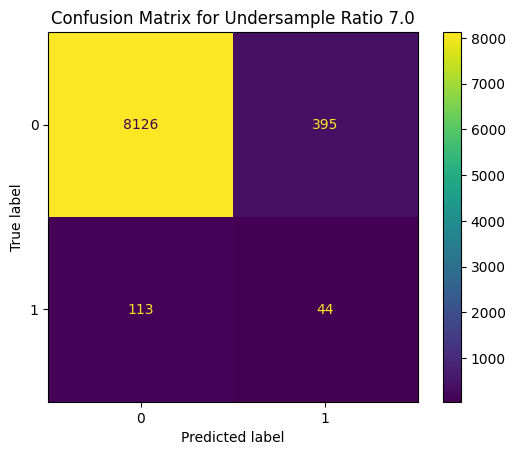

calculating distances:  75%|███████▌  | 9/12 [00:21<00:09,  3.23s/it]

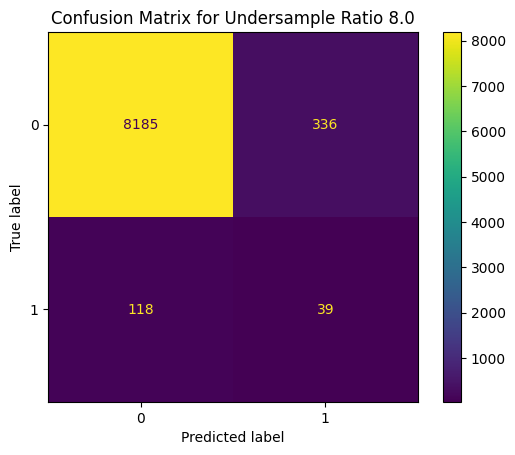

calculating distances:  83%|████████▎ | 10/12 [00:26<00:07,  3.73s/it]

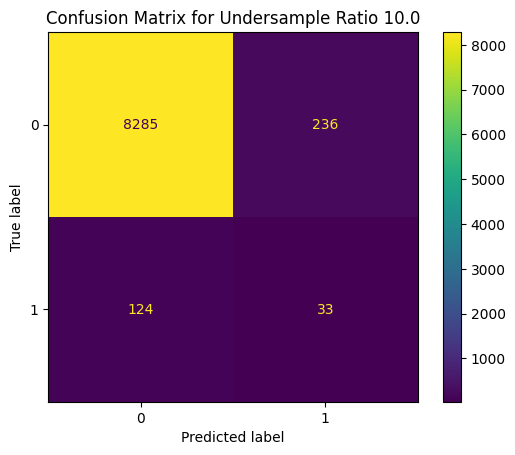

calculating distances:  92%|█████████▏| 11/12 [00:32<00:04,  4.43s/it]

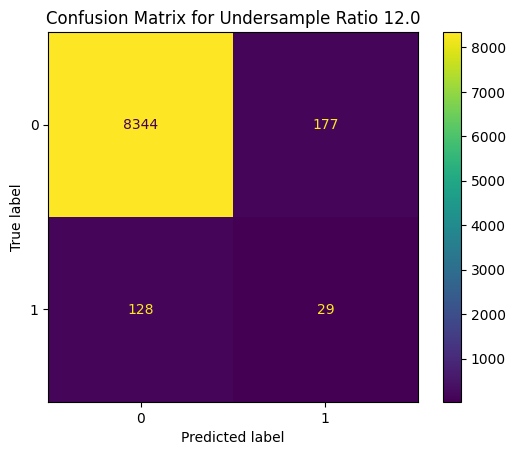

calculating distances: 100%|██████████| 12/12 [00:39<00:00,  3.30s/it]


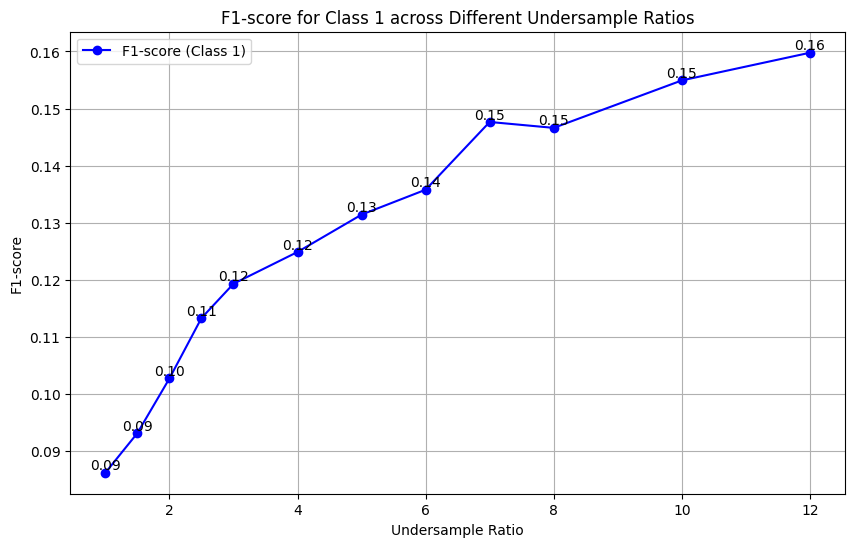

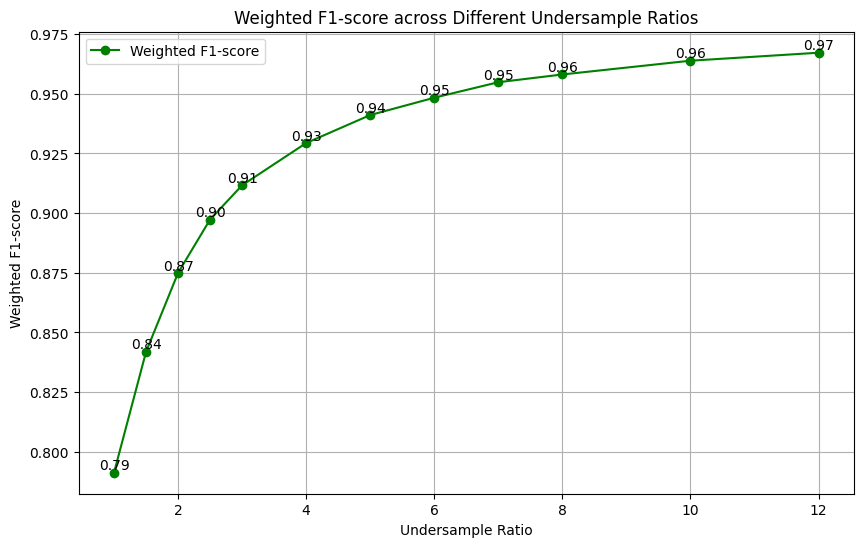

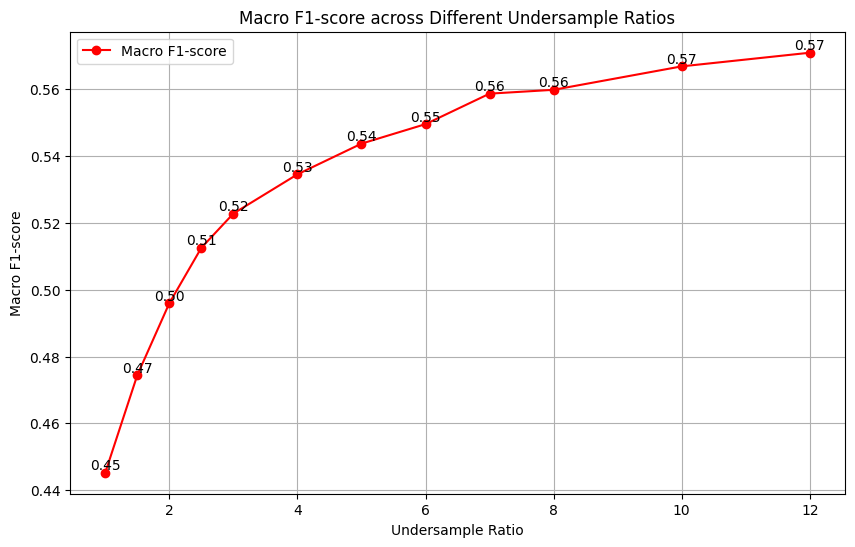

In [ ]:
# @title
import matplotlib.pyplot as plt

# Set up variables for storing results
k = 5  # Number of neighbors
reports = {}
test_data = (X_test.values, y_test.values)

# Loop through each training dataset with a progress bar
for ratio, (X_train, y_train) in tqdm(train_datasets.items(), desc="calculating distances"):
    y_pred = knn_predict_cos(X_train.values, y_train.values, X_test.values, k=k)

    # Generate classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    reports[ratio] = report

    # Plot confusion matrix for each ratio
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title(f'Confusion Matrix for Undersample Ratio {ratio}')
    plt.show()

# Extract the f1, weighted f1, and macro f1 scores from each report
ratios = sorted(reports.keys())  # Get the ratios in sorted order for consistent plotting

# Prepare lists to store the values
f1_scores = []
weighted_f1_scores = []
macro_f1_scores = []

for ratio in ratios:
    f1_scores.append(reports[ratio]['1']['f1-score'])              # f1-score for class '1'
    weighted_f1_scores.append(reports[ratio]['weighted avg']['f1-score'])
    macro_f1_scores.append(reports[ratio]['macro avg']['f1-score'])

# Plot F1-score for class '1'
plt.figure(figsize=(10, 6))
plt.plot(ratios, f1_scores, marker='o', color='b', label='F1-score (Class 1)')
for i, score in enumerate(f1_scores):
    plt.text(ratios[i], score, f"{score:.2f}", ha='center', va='bottom')
plt.xlabel('Undersample Ratio')
plt.ylabel('F1-score')
plt.title('F1-score for Class 1 across Different Undersample Ratios')
plt.legend()
plt.grid()
plt.show()

# Plot Weighted F1-score
plt.figure(figsize=(10, 6))
plt.plot(ratios, weighted_f1_scores, marker='o', color='g', label='Weighted F1-score')
for i, score in enumerate(weighted_f1_scores):
    plt.text(ratios[i], score, f"{score:.2f}", ha='center', va='bottom')
plt.xlabel('Undersample Ratio')
plt.ylabel('Weighted F1-score')
plt.title('Weighted F1-score across Different Undersample Ratios')
plt.legend()
plt.grid()
plt.show()

# Plot Macro F1-score
plt.figure(figsize=(10, 6))
plt.plot(ratios, macro_f1_scores, marker='o', color='r', label='Macro F1-score')
for i, score in enumerate(macro_f1_scores):
    plt.text(ratios[i], score, f"{score:.2f}", ha='center', va='bottom')
plt.xlabel('Undersample Ratio')
plt.ylabel('Macro F1-score')
plt.title('Macro F1-score across Different Undersample Ratios')
plt.legend()
plt.grid()
plt.show()


# search for K

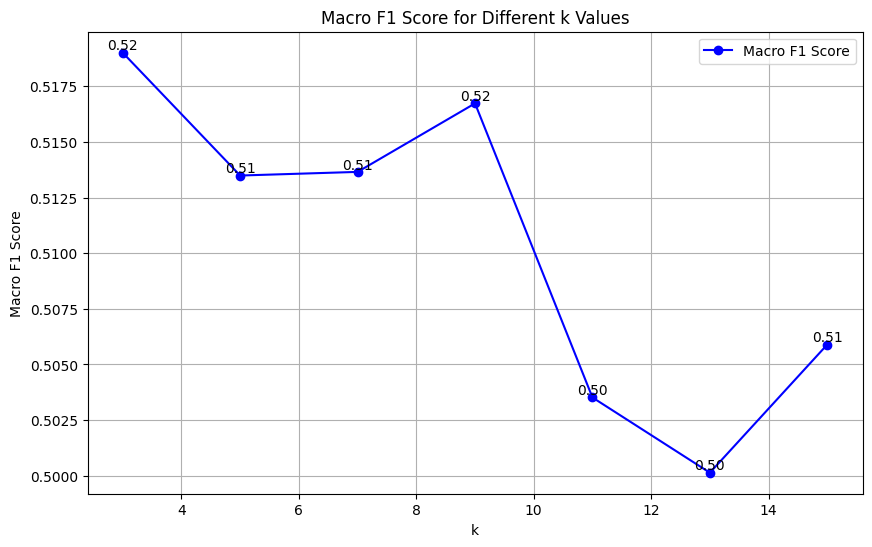

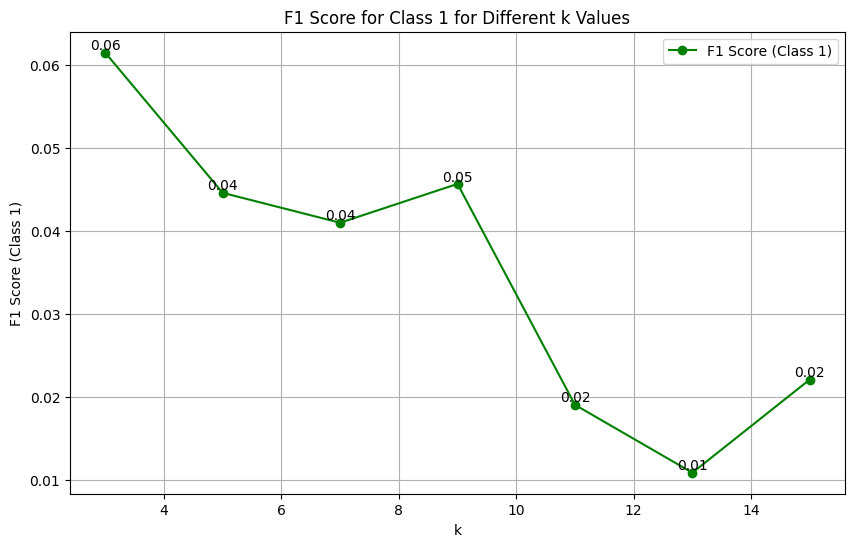

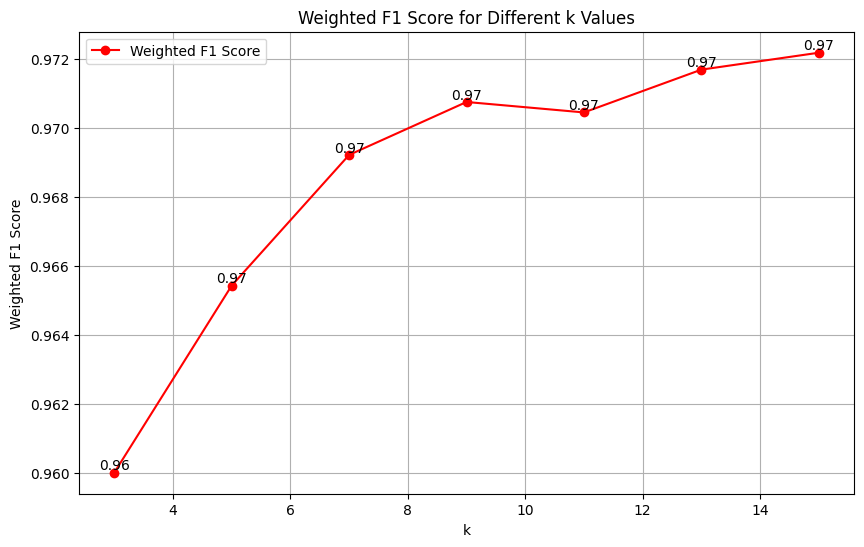

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Define the range of k values to test
k_values = range(3, 16, 2)  # 3, 5, 7, ..., 15

# Prepare lists to store the metrics for each k
macro_f1_scores = []
class_1_f1_scores = []
weighted_f1_scores = []

# Extract the selected training dataset
X_train, y_train = train_datasets[12]

# Loop through each k and evaluate the model
for k in k_values:
    # Make predictions with the current k
    y_pred = knn_predict(X_train.values, y_train.values, X_test.values, k=k)

    # Generate classification report and extract metrics
    report = classification_report(y_test, y_pred, output_dict=True)

    # Store the desired metrics
    macro_f1_scores.append(report['macro avg']['f1-score'])
    class_1_f1_scores.append(report['1']['f1-score'])  # F1 score for class 1
    weighted_f1_scores.append(report['weighted avg']['f1-score'])

# Plot Macro F1 score for different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, macro_f1_scores, marker='o', color='b', label='Macro F1 Score')
for i, score in enumerate(macro_f1_scores):
    plt.text(k_values[i], score, f"{score:.2f}", ha='center', va='bottom')
plt.xlabel('k')
plt.ylabel('Macro F1 Score')
plt.title('Macro F1 Score for Different k Values')
plt.legend()
plt.grid()
plt.show()

# Plot F1 score for class 1 for different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, class_1_f1_scores, marker='o', color='g', label='F1 Score (Class 1)')
for i, score in enumerate(class_1_f1_scores):
    plt.text(k_values[i], score, f"{score:.2f}", ha='center', va='bottom')
plt.xlabel('k')
plt.ylabel('F1 Score (Class 1)')
plt.title('F1 Score for Class 1 for Different k Values')
plt.legend()
plt.grid()
plt.show()

# Plot Weighted F1 score for different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, weighted_f1_scores, marker='o', color='r', label='Weighted F1 Score')
for i, score in enumerate(weighted_f1_scores):
    plt.text(k_values[i], score, f"{score:.2f}", ha='center', va='bottom')
plt.xlabel('k')
plt.ylabel('Weighted F1 Score')
plt.title('Weighted F1 Score for Different k Values')
plt.legend()
plt.grid()
plt.show()


# k=3 and ratio=12

In [45]:
opt_k=29
opt_ratio=4
opt_X_train, opt_y_train = train_datasets[opt_ratio]
X_test_data, y_test_data = X_test, y_test

In [46]:
# Use the optimal k value to make predictions
y_pred = knn_predict(opt_X_train.values, opt_y_train.values, X_test_data.values, k=opt_k )

# Generate and print classification report
report = classification_report(y_test_data, y_pred, output_dict=True)
print("Classification Report:")
print(classification_report(y_test_data, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      8521
           1       0.06      0.15      0.08       157

    accuracy                           0.94      8678
   macro avg       0.52      0.55      0.52      8678
weighted avg       0.97      0.94      0.95      8678



In [ ]:
opt_X_train.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
30792,0.0,0.944774,0.0,0.0,1.643248,1.0,2.951792,4.317751,1.0,0.0,0.0,0.0,0.0,0.0,1.617084,0.0
33288,0.0,-2.263217,0.0,0.0,0.000000,0.0,0.909628,-0.554107,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0
23997,1.0,1.024973,0.0,0.0,1.643248,1.0,3.743965,-0.437182,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,0.0
35173,0.0,0.623975,0.0,0.0,1.643248,1.0,-1.271340,-0.294274,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,0.0
22586,1.0,-0.418623,0.0,0.0,0.000000,0.0,-0.551636,2.005242,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0


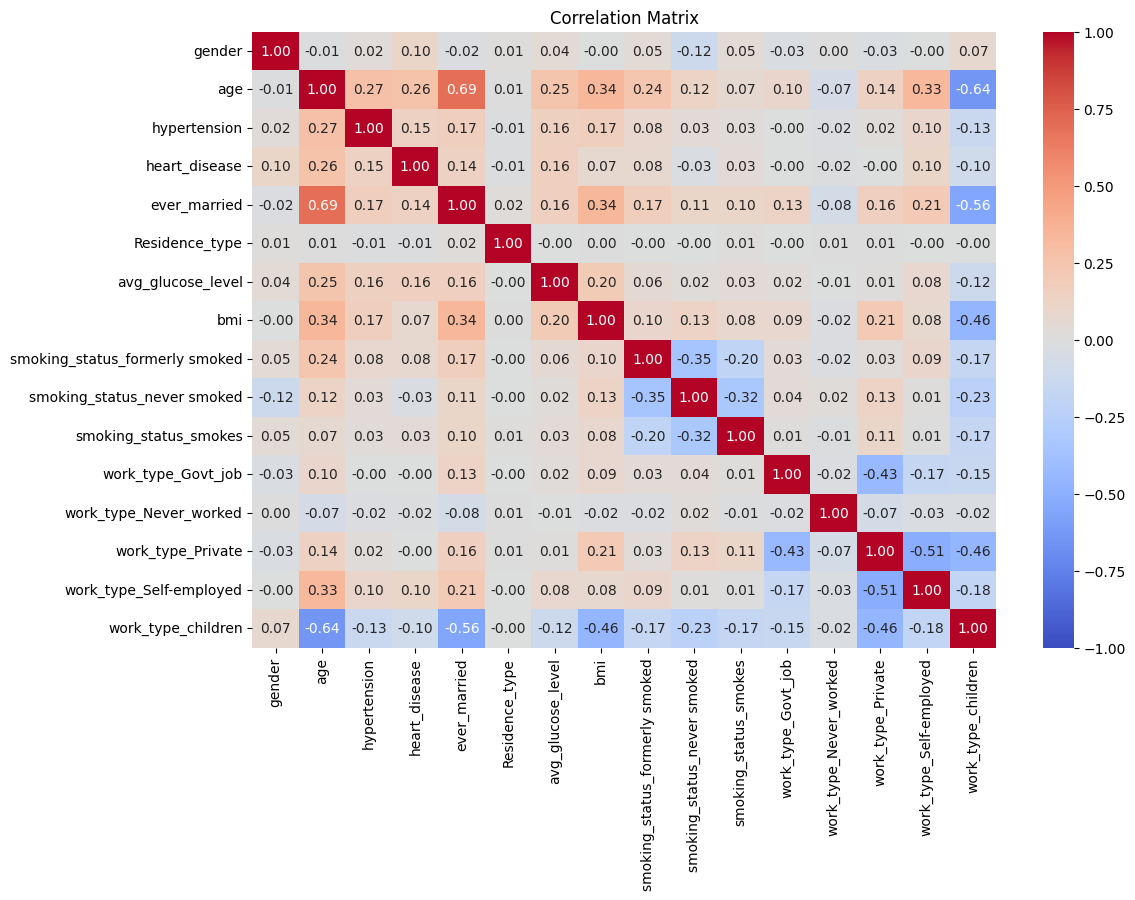

Highly correlated pairs: []


In [ ]:
# @title
corr_matrix = X_train.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

# Find pairs of features with high correlation
high_corr_pairs = [(feature, other_feature) for feature in corr_matrix.columns for other_feature in corr_matrix.columns
                   if feature != other_feature and abs(corr_matrix.loc[feature, other_feature]) > 0.8]

print("Highly correlated pairs:", high_corr_pairs)


<ipython-input-192-4632bef9b9d6>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.values, y=target_corr.index, palette="viridis")


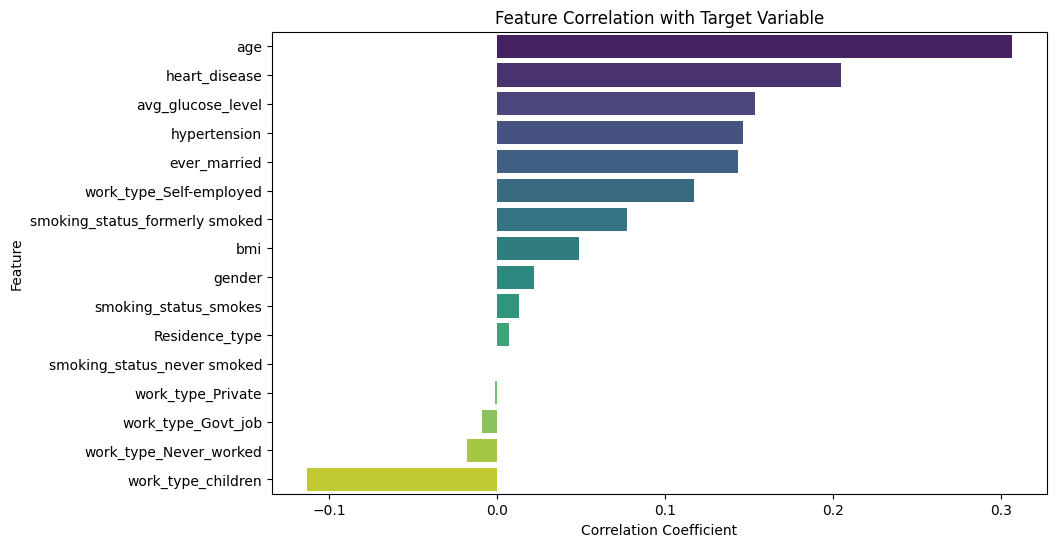

age                               0.306159
heart_disease                     0.204543
avg_glucose_level                 0.153178
hypertension                      0.145917
ever_married                      0.143248
work_type_Self-employed           0.117084
smoking_status_formerly smoked    0.076938
bmi                               0.048350
gender                            0.021894
smoking_status_smokes             0.012894
Residence_type                    0.006977
smoking_status_never smoked      -0.000177
work_type_Private                -0.001201
work_type_Govt_job               -0.009450
work_type_Never_worked           -0.017903
work_type_children               -0.113235
Name: target, dtype: float64


In [ ]:
# Assuming X contains the features and y is the target variable
# Combine X and y into a single DataFrame for easier correlation analysis
data = pd.concat([opt_X_train, y.rename('target')], axis=1)

# Calculate the correlation matrix
correlations = data.corr()

# Extract correlations with the target variable and sort them
target_corr = correlations['target'].drop('target').sort_values(ascending=False)

# Plot the correlations with the target variable
plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.values, y=target_corr.index, palette="viridis")
plt.title("Feature Correlation with Target Variable")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.show()

# low_corr_features = target_corr[abs(target_corr) < 0.02].index.tolist()

# print("Features with correlation below 0.02 with the target variable:")
# print(low_corr_features)
print(target_corr)


In [ ]:
# Select high-correlation features
high_corr_features = target_corr[(target_corr > 0.1) | (target_corr < -0.1)]
print("High-correlation features:", high_corr_features)

# Calculate the sum of absolute correlations for proportional scaling
total_corr_sum = high_corr_features.abs().sum()

# Rescale each high-correlation feature in X_train and X_test based on proportional scaling
for feature, corr_value in high_corr_features.items():
    scaling_factor = 1 + abs(corr_value) / total_corr_sum
    print(scaling_factor,feature)
    opt_X_train[feature] *= scaling_factor
    X_test_data[feature] *= scaling_factor



age                        0.306159
heart_disease              0.204543
avg_glucose_level          0.153178
hypertension               0.145917
ever_married               0.143248
work_type_Self-employed    0.117084
work_type_children        -0.113235
Name: target, dtype: float64


In [ ]:
X_test_data.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
4452,0.0,2.025528,0.0,0.0,2.143248,0.0,5.465114,2.070201,0.0,1.0,0.0,0.0,0.0,0.0,2.117084,0.000000
2969,1.0,-2.480139,0.0,0.0,0.000000,1.0,-1.193408,-0.735989,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000
36247,1.0,1.308717,0.0,0.0,2.143248,0.0,-1.209888,0.524198,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.000000
10863,0.0,-2.992147,0.0,0.0,0.000000,0.0,-1.416141,-1.593436,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,2.113235
5458,0.0,1.718323,0.0,0.0,2.143248,1.0,-2.079346,0.939930,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000


In [ ]:
# X_train, y_train = train_datasets[opt_ratio]
# X_train = X_train.drop(columns=low_corr_features)
# X_train.head()

# X_test_data, y_test_data = X_test, y_test  # Assuming X_test and y_test are defined
# X_test_data = X_test_data.drop(columns=low_corr_features)

In [ ]:
# Use the optimal k value to make predictions
y_pred = knn_predict(opt_X_train.values, opt_y_train.values, X_test_data.values, k=opt_k)

# Generate and print classification report
report = classification_report(y_test_data, y_pred, output_dict=True)
print("Classification Report:")
print(classification_report(y_test_data, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      8521
           1       0.14      0.32      0.20       157

    accuracy                           0.95      8678
   macro avg       0.56      0.64      0.59      8678
weighted avg       0.97      0.95      0.96      8678



In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce features to 5 principal components (you can adjust this number)
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)

# Check explained variance to see how much information is retained
print("Explained Variance Ratio:", sum(pca.explained_variance_ratio_))
print("Cumulative Explained Variance:", pca.explained_variance_ratio_.cumsum())

X_test_data_pca = pca.fit_transform(X_test_data)

# Use the optimal k value to make predictions
y_pred = knn_predict(X_train_pca, y_train.values, X_test_data_pca, k=opt_k)

# Generate and print classification report
report = classification_report(y_test_data, y_pred, output_dict=True)
print("Classification Report:")
print(classification_report(y_test_data, y_pred))

Explained Variance Ratio: 0.9509391357946518
Cumulative Explained Variance: [0.34393408 0.52080822 0.65832903 0.72196389 0.77795943 0.82702207
 0.87104363 0.90313173 0.93075001 0.95093914]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8521
           1       0.13      0.27      0.17       157

    accuracy                           0.95      8678
   macro avg       0.56      0.62      0.58      8678
weighted avg       0.97      0.95      0.96      8678

